In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
# print(os.getcwd())
path = "\\".join(os.getcwd().split('\\')[:-1])
# print(path)

d:\PESU\Sem 5\Data Analytics\DataAnalytics\EDA
d:\PESU\Sem 5\Data Analytics\DataAnalytics


In [17]:
data_path = path + "\\Datasets\\"
# print(os.listdir())
df = pd.read_csv(path + "\\Indicator.csv")
df.head()


,Indicator_Code,Indicator_Name,included,feature_name
0,SP.POP.GROW,Population Growth (in %),1,pop_grow
1,SI.POV.GINI,Gini Index,1,gini_index
2,NY.GDP.PCAP.KD.ZG,GDP per capita growth (in %),1,gdp_percap
3,SE.XPD.TOTL.GB.ZS,"Government expenditure on education, total (% ...",0,NaN
4,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ...",0,NaN


In [18]:
indicator_csvs = [data_path + i for i in df.Indicator_Code]
df1 = ["//".join(i.split("//")) for i in indicator_csvs]
gov_exp = pd.read_csv(df1[3] + "//" + os.listdir(df1[3])[0])

In [19]:
#dimensionality reduction since data is very sparse till 2000.
i = 1960
while i <= 2000:
    gov_exp.drop(columns=[str(i)],axis=1, inplace=True)
    i += 1

In [20]:
print(gov_exp.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')


In [21]:
count = 0
i = 2001
are_there_values = {}
while i <= 2016:
    for data in gov_exp[str(i)]:
            are_there_values[i] = 0
    i += 1
    
i = 2001
while i <= 2016:
    for data in gov_exp[str(i)]:
        if data > 0:
            are_there_values[i] += 1
    i += 1
    
print(are_there_values)

{2001: 140, 2002: 148, 2003: 126, 2004: 155, 2005: 138, 2006: 128, 2007: 129, 2008: 158, 2009: 148, 2010: 159, 2011: 154, 2012: 147, 2013: 155, 2014: 151, 2015: 136, 2016: 137}


In [22]:
expenditure = {}
for i in gov_exp['Country Name']:
    expenditure[i] = 0
#print(expenditure)

valid_years = []
i = 2001
while i <= 2016:
    valid_years.append(i)
    i += 1
print(valid_years)

'''expenditure_sum = {}
for year in valid_years:
    expenditure_sum[year] = 0

for year in expenditure_sum.keys():
    for data in gov_exp[str(year)]:
        if data > 0:
            expenditure_sum[year] += data
            
'''
i = 0
for country in expenditure.keys():
    for year in valid_years:
        if gov_exp[str(year)][i] > 0:
            expenditure[country] = expenditure[country] + gov_exp[str(year)][i]
    i += 1          
#print(expenditure)

no_of_values = {}
for country in expenditure.keys():
    no_of_values[country] = 0

i = 0
for country in no_of_values.keys():
    for year in valid_years:
        if gov_exp[str(year)][i] > 0:
            no_of_values[country] += 1
    i += 1

#print(no_of_values)
    
avg_expenditure = {}
for country in expenditure.keys():
    if no_of_values[country] == 0 or no_of_values[country] < 9:
        avg_expenditure[country] = -1
    else:
        avg_expenditure[country] = expenditure[country] / no_of_values[country]
print()  
#print(avg_expenditure)
    

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



In [23]:
sorted_d = sorted(avg_expenditure.items(), key=lambda x: x[1])
#print(sorted_d)

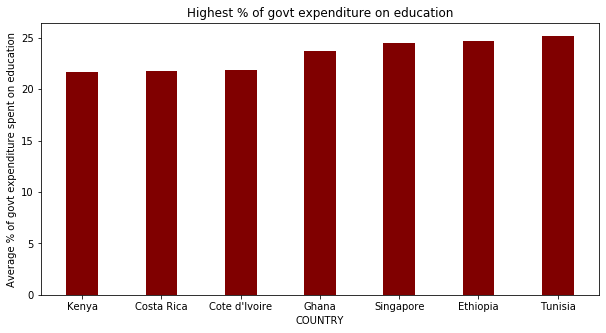

In [24]:
import matplotlib.pyplot as plt
#ax = fig.add_axes([15,15,2,1])
countries = [ 'Kenya','Costa Rica','Cote d\'Ivoire', 'Ghana','Singapore',  'Ethiopia','Tunisia', ]
avg_gdp = [21.707,  21.799, 21.873,23.680, 24.470,  24.652, 25.168]
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(countries, avg_gdp, color ='maroon',  
        width = 0.4) 
plt.xlabel("COUNTRY") 
plt.ylabel("Average % of govt expenditure spent on education") 
plt.title("Highest % of govt expenditure on education") 
plt.show() 

In [25]:
singapore = {}
india = {}

for year in valid_years:
    singapore[year] = 0
    india[year] = 0

for year in valid_years:
    singapore[year] = gov_exp[str(year)][206]
    india[year] = gov_exp[str(year)][107]
    

for year in india.keys():
    if not(india[year] > 0):
        india[year] = 12.349
    if not(singapore[year] > 0):
        singapore[year] = 24.470
print(count)
print(singapore)
print()
print(india)

0
{2001: 21.55666, 2002: 21.41607, 2003: 24.759829999999997, 2004: 22.744410000000002, 2005: 22.27879, 2006: 22.53678, 2007: 23.23229, 2008: 30.09941, 2009: 21.852970000000003, 2010: 18.57173, 2011: 28.86184, 2012: 31.37175, 2013: 28.83915, 2014: 24.47, 2015: 24.47, 2016: 24.47}

{2001: 12.349, 2002: 12.349, 2003: 12.4108, 2004: 11.196860000000001, 2005: 11.20846, 2006: 11.693710000000001, 2007: 12.349, 2008: 12.349, 2009: 11.1912, 2010: 11.833680000000001, 2011: 13.564910000000001, 2012: 13.992120000000002, 2013: 14.05018, 2014: 12.349, 2015: 12.349, 2016: 12.349}


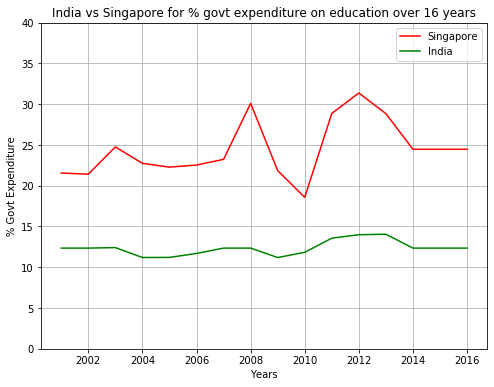

In [26]:

plt.figure(figsize=(8,6))
plt.grid(True)
plt.title("India vs Singapore for % govt expenditure on education over 16 years")
plt.xlabel("Years")
plt.ylabel("% Govt Expenditure")
plt.ylim(0,40)
plt.plot(np.array(list(singapore.keys())),np.array(list(singapore.values())),color="red")
plt.plot(np.array(list(india.keys())),np.array(list(india.values())),color="green")
plt.legend(["Singapore","India"])
plt.show()